## ITMGT25 EE
### Long Test 2

Lecturer: Joben Ilagan

**First Name:** Jaden

**Last Name:** Sarmiento

**Student ID:** 184464

### Part A: Data Validation and Pattern Matching

#### 1) Password Strength Indicator

Write a function **validate_new_password** that accepts a new password and checks for the following in mandatory order, that is, the password will only be evaluated to the next strength level if weaker conditions before it are met.

*Minimum. If not met, password is deemed unacceptable and do not check other conditions*
* must be at least 8 characters **including** special characters (so any character)

*Weak*
* meets minimum password condition and must contain at least one (1) upper case letter

*Medium*
* meets at least the weak password condition and must have at least one (1) numeric character

*Strong*
* meets at least the medium password condition and must have at least one special character among the following: + @ ! * .

The function must return a string with the following possible values:
* 'unacceptable'
* 'minimum'
* 'weak'
* 'medium'
* 'strong'

**(25 Points)**

In [199]:
import re

def validate_new_password(password):
    """
    @type: str
    @rtype: str
    
    This one is weak because it does not have at least one numeric character
    >>> validate_new_password("Youshallnotpass")
    'weak'
    
    This one is minimum because it meets the minimum eight characters required
    Regex users: note that \w may not work, so choose another pattern strategy
    >>> validate_new_password("p@ssw0rd")
    'minimum'
    
    >>> validate_new_password("Y0ush@lln0tp@ss")
    'strong'
    
    This one is medium because it has at least one capitalized letter ("Q")
    >>> validate_new_password("Qwerty123")
    'medium'
    
    This one, in spite of having one capitalized letter, one or more special characters,
    and one numeric character, is still unacceptable because it doesn't even meet
    the minimum number of characters
    >>> validate_new_password("X!@1a")
    'unacceptable'
    

    """
    result="unacceptable"
    
    # write your code below
    # ---------------------
  
    match1 = re.search(r"[\w]{7,}",password) 
    match2 = re.search(r".*[@+!*.].*", password)
    match3 = re.search(r".*[0-9].*", password)
    match4 = re.search(r".*[A-Z].*", password)
    if match1:
        if match4:
            if match3:
                if match2:
                    result="strong"
                
            else:
                result ="medium"
                
        else:
            result = "weak"
    else:
        result = "unacceptable"
        
         
    # ---------------------
    # end of your code
    
    return result
          

In [200]:
# Optional: run to see if your code is correct
import doctest

doctest.testmod()

**********************************************************************
File "__main__", line 9, in __main__.validate_new_password
Failed example:
    validate_new_password("Youshallnotpass")
Expected:
    'weak'
Got:
    'medium'
**********************************************************************
File "__main__", line 14, in __main__.validate_new_password
Failed example:
    validate_new_password("p@ssw0rd")
Expected:
    'minimum'
Got:
    'unacceptable'
**********************************************************************
File "__main__", line 17, in __main__.validate_new_password
Failed example:
    validate_new_password("Y0ush@lln0tp@ss")
Expected:
    'strong'
Got:
    'unacceptable'
**********************************************************************
File "__main__", line 21, in __main__.validate_new_password
Failed example:
    validate_new_password("Qwerty123")
Expected:
    'medium'
Got:
    'unacceptable'
*****************************************************************

TestResults(failed=4, attempted=5)

In [194]:
# Perform your tests here. Use the docstring test data above for guidance.
validate_new_password("Y0ush@lln0tp@ss")

'unacceptable'

### Part B: Numeric Computations

From this point onwards, there is no real requirement to define functions with expected return values.

**2) Software Services Company Scenario** 

You own a software company and a client wishes you to quote for work on a mobile app on a fixed price basis. You and your time come up with estimates based on roles and daily rates. You are given the project time and effort estimates and you are able to come up with NumPy arrays below:


In [8]:
import numpy as np

roles       = np.array(["Programmer","Project Manager","Business Analyst","QA Analyst","UX Designer"])
daily_rates = np.array([8500,14000,10000,8500,8500])
man_days    = np.array([20,20,10,10,10])

Note: a **man-day** is a day regarded in terms of the amount of work that can be done by one person within this period (one day in this case). Therefore, in our estimates above, the project will take 20 days of a Programmer's time, 20 days of a Project Manager's time, and so on. **Daily Rates** are the unit price per man day for a given role.

The project cost component for a particular role is computed as follows:

**project cost for role x = (daily rate of role x) * (man days rendered by role x)**

**2a)**

How much will the project cost to the customer be, broken down by role involvement (a.k.a. project cost for role)? Do a quick dump of the breakdown below (no need to use pure NumPy for printing the breakdown for now).

**(5 points)**

In [11]:
## write your code below
## -------------------------

project_cost = daily_rates * man_days
project_cost

for i in range (0,5):
    print (str(roles[i])+": "+str(project_cost[i]))
        




Programmer: 170000
Project Manager: 280000
Business Analyst: 100000
QA Analyst: 85000
UX Designer: 85000


**2b)**

To mitigate risks involving fixed-price projects, it's usually industry practice to pad around 20-30% on top of the base quote. Let's pad 30% to be on the safe side because the customer hasn't been very clear on what the real needs of the mobile app are.

To be clear: "padding" means applying a certain percentage on top of the base. In our case, it's multiplying 1.30 to the base cost.

How much would you quote the customer? Use NumPy operations to derive this.

**(5 points)**

In [13]:
## write your code below
## ------------------------------------


padding_cost = sum(project_cost)
padding_cost = padding_cost * 1.3
print (padding_cost)





936000.0


The customer agrees to your quote and is happy with the price. However, the person designated by the customer to provide the details required by your UX designers took long. Also, when the details were given, the programmers were not clear on what was actually needed. When the customer finally inspected the work, there were lots of revisions done. The Project Manager also had to stay longer because of the delays. QA too had to do another round of testing.

The actual days rendered by each role are shown below:

In [14]:
actual_man_days    = np.array([30,25,10,20,20])

**2c)**

These extra man days could have been used to earn extra for the company in other more profitable projects.

To compute this opportunity loss, we simply multiply the days lost by the daily rates per role.

What is the opportunity loss per role?

**(3 points)**

In [15]:
## write your code below for opportunity loss per role
## ----------------------------------------------------
new_man_days = actual_man_days - man_days
opportunity_lost = daily_rates * new_man_days
opportunity_lost



array([85000, 70000,     0, 85000, 85000])

**2d)**

What is the total opportunity loss (a.k.a. "project leak")?

**(2 points)**

In [17]:
## write your code below for total opportunity loss
## ------------------------------------------------
sum(opportunity_lost)




325000

### Part C: Data Extraction, Loading and Transformation

Consider this dataset from the Philippine Statisics Authority [website](http://openstat.psa.gov.ph/PXWeb/pxweb/en/DB/DB__2G/0032G4CBPC0.px/?rxid=bdf9d8da-96f1-4100-ae09-18cb3eaeb313).

The file has already been downloaded for you and saved as **dataset.csv**.

* Number - refer to the total number of units constructed
* Floor area - refer to the sum of the area of construction
* Type - refer to the use of the construction
* Value - refer to the total estimated value of construction

#### 3) Extraction of new data

**3a)**

Load the file **dataset.csv** into a Pandas DataFrame

**(15 Points)**


In [18]:
import pandas as pd

## write your code below
## ------------------------

ds = pd.read_csv('dataset.csv')


ds

Construction Statistics from Approved Building Permits
Year Period    Geolocation                                   Total Number Total Floor area Total Value Residential Number Residential Floor area Residential Value Non-residential Number Non-residential Floor area Non-residential Value Additions Number Additions Floor area Additions Value Alterations/Repairs/Renovations Number Alterations/Repairs/Renovations Floor area Alterations/Repairs/Renovations Value Demolitions Number Demolitions Floor area Demolitions Value Street furnitures... Number Street furnitures... Floor area                         Street furnitures... Value    
2017 Annual    PHILIPPINES                                   152012       31884027         333214520   110942             16301228               164153250         21349                  15035707                   143315470             5086             547092               4301000         14635                                  ..                                         21444800                              399                ..                     93549             1346                        ..                                                                         1855228    
               ..National Capital Region (NCR)               12612        6636192          101147791   6477               3858427                53003187          1415                   2678456                    35241138              381              99309                859346          4339                                   ..                                         12044119                              284                ..                     5906              136                         ..                                                                          582239    
               ..Cordillera Administrative Region (CAR)      1303         383183           4692144     952                246940                 2697933           219                    121080                     1571763               40               15163                193085          92                                     ..                                         229363                                0                  ..                     0                 5                           ..                                                                            8766    
               ..Region I (Ilocos Region)                    10610        1402633          12913225    7614               808002                 7177823           1461                   559370                     4832591               467              35261                289560          1068                                   ..                                         613252                                15                 ..                     732               152                         ..                                                                           80525    
               ..Region II (Cagayan Valley)                  4581         707831           6459199     3550               298692                 2665248           774                    406085                     3510620               27               3054                 23195           230                                    ..                                         260136                                4                  ..                     599               24                          ..                                                                           26707    
               ..Region III (Central Luzon)                  16340        4369511          33433864    11386              1792612                15758408          3086                   2483910                    15839736              437              92989                563558          1431                                   ..                                         1272162                               22                 ..           

**3b)**

Inspect the header of the new dataframe

**(5 points)**

In [24]:
## write your code below
## ---------------------

ds.head(0)
ds.head(1)



,,,,,,,,,,,,,,,,,,,,,,,Construction Statistics from Approved Building Permits
Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,Non-residential Floor area,Non-residential Value,Additions Number,Additions Floor area,Additions Value,Alterations/Repairs/Renovations Number,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value


**3c)**

You'll note that there is an extra line on top (as you scroll to the right).

Reload the data again, this time skipping the first row. Re-inspect the header to see if the extra line is now gone.

**(5 points)**

In [42]:
# write your code to reload the csv here
ds1 = pd.read_csv('dataset.csv')
ds1




,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Additions Value,Alterations/Repairs/Renovations Number,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value
0,2017,Annual,PHILIPPINES,152012,31884027,333214520,110942,16301228,164153250,21349,...,4301000,14635,..,21444800,399,..,93549,1346,..,1855228
1,2017,Annual,..National Capital Region (NCR),12612,6636192,101147791,6477,3858427,53003187,1415,...,859346,4339,..,12044119,284,..,5906,136,..,582239
2,2017,Annual,..Cordillera Administrative Region (CAR),1303,383183,4692144,952,246940,2697933,219,...,193085,92,..,229363,0,..,0,5,..,8766
3,2017,Annual,..Region I (Ilocos Region),10610,1402633,12913225,7614,808002,7177823,1461,...,289560,1068,..,613252,15,..,732,152,..,80525
4,2017,Annual,..Region II (Cagayan Valley),4581,707831,6459199,3550,298692,2665248,774,...,23195,230,..,260136,4,..,599,24,..,26707
5,2017,Annual,..Region III (Central Luzon),16340,4369511,33433864,11386,1792612,15758408,3086,...,563558,1431,..,1272162,22,..,1164,123,..,101878
6,2017,Annual,..Region IV-A (CALABARZON),37612,6591949,61631254,29260,3967770,34693849,3152,...,1129117,2318,..,1773690,11,..,9472,149,..,230907
7,2017,Annual,..MIMAROPA Region,2432,434325,4453365,1569,172470,1452869,721,...,28561,117,..,167215,0,..,0,16,..,57225
8,2017,Annual,..Region V (Bicol Region),3179,528550,5442205,2168,235282,2216992,675,...,57884,268,..,181796,14,..,2029,11,..,3089
9,2017,Annual,..Region VI (Western Visayas),11545,2116442,21174959,8935,1084038,10698583,1648,...,107675,771,..,729920,6,..,24,161,..,140552


**3d)**

Inspect the tail of the dataframe to see if any extraneous lines were read in. Were there any? If so, discard. Otherwise, leave as-is.

**(5 points)**

In [43]:
## write your code below
## ---------------------

ds1.tail(1)
ds1.tail(2)





,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Additions Value,Alterations/Repairs/Renovations Number,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value
1138,2006,Quarter 4,..Autonomous Region in Muslim Mindanao (ARMM),..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1139,2006,Quarter 4,..Negros Island Region,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


**3e)**

Display the columns of the new dataframe. Write the command below to dump information about the columns on the output area below the cell.

**(5 points)**

In [45]:
## write your code here

ds1.columns




Index(['Year', 'Period', 'Geolocation', 'Total Number', 'Total Floor area',
       'Total Value', 'Residential Number', 'Residential Floor area',
       'Residential Value', 'Non-residential Number',
       'Non-residential Floor area', 'Non-residential Value',
       'Additions Number', 'Additions Floor area', 'Additions Value',
       'Alterations/Repairs/Renovations Number',
       'Alterations/Repairs/Renovations Floor area',
       'Alterations/Repairs/Renovations Value', 'Demolitions Number',
       'Demolitions Floor area', 'Demolitions Value',
       'Street furnitures... Number', 'Street furnitures... Floor area',
       'Street furnitures... Value'],
      dtype='object')

**3f)**

In one or two paragraphs, what other observations of the data can you make?

* How many columns are there?
* How do you describe the overall structure of the data?
* Is it easy to perform analysis on? 
* How do you envision cleaning and transforming the data further?
* Are they mostly numeric?
* Are there any missing values?

**(10 points)**

*Write your answers in this cell in Markdown format.* (double-click to edit)

-----

There was one column at first because it considered the header of the CSV file as a column. Due to this, it was difficult to reference the data per column at first. This also makes it difficult to perform analysis on. There was a need to be able to remove the header and recognize the first row after the headers as the columns themselves. The datatypes of these numbers were string and therefore needed to be changed to integers/numeric values in order to anayze them further.






#### 4) Produce Clean Data

**4a)**

The numeric figures have ".."s mixed within. 

Replace these with zeros (0s) for the whole dataframe.

**Be careful!** The data in Geolocation also has trailing ".."s so make sure you don't accidentally replace these with zeros as well.

**(25 Points)**


In [ ]:
ds.loc[:,"Alterations/Repairs/Renovations Floor area"].replace(r"^..","0",regex=True, inplace=True)

In [49]:
## write your code below
## ---------------------

ds1.loc[:,"Total Number"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Total Floor area"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Total Value"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Residential Number"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Alterations/Repairs/Renovations Floor area"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Demolitions Floor area"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Street furnitures... Floor area"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Street furnitures... Value"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Residential Floor area"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Residential Value"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Non-residential Number"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Non-residential Floor area"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Non-residential Value"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Additions Number"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Additions Floor area"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Additions Value"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Alterations/Repairs/Renovations Number"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Alterations/Repairs/Renovations Value"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Demolitions Number"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Demolitions Floor area"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Demolitions Value"].replace(r"^..","0",regex=True, inplace=True)
ds1.loc[:,"Street furnitures... Number"].replace(r"^..","0",regex=True, inplace=True)






In [50]:
ds1

,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Additions Value,Alterations/Repairs/Renovations Number,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value
0,2017,Annual,PHILIPPINES,02012,0884027,03214520,00942,0301228,04153250,0349,...,001000,0635,0,0444800,09,0,0549,046,0,055228
1,2017,Annual,..National Capital Region (NCR),0612,036192,01147791,077,058427,0003187,015,...,09346,039,0,0044119,04,0,006,06,0,02239
2,2017,Annual,..Cordillera Administrative Region (CAR),003,03183,092144,02,06940,097933,09,...,03085,0,0,09363,0,0,0,5,0,066
3,2017,Annual,..Region I (Ilocos Region),0610,002633,0913225,014,08002,077823,061,...,09560,068,0,03252,0,0,02,02,0,0525
4,2017,Annual,..Region II (Cagayan Valley),081,07831,059199,050,08692,065248,04,...,0195,00,0,00136,4,0,09,0,0,0707
5,2017,Annual,..Region III (Central Luzon),0340,069511,0433864,0386,092612,0758408,086,...,03558,031,0,072162,0,0,064,03,0,01878
6,2017,Annual,..Region IV-A (CALABARZON),0612,091949,0631254,0260,067770,0693849,052,...,029117,018,0,073690,0,0,072,09,0,00907
7,2017,Annual,..MIMAROPA Region,032,04325,053365,069,02470,052869,01,...,0561,07,0,07215,0,0,0,0,0,0225
8,2017,Annual,..Region V (Bicol Region),079,08550,042205,068,05282,016992,05,...,0884,08,0,01796,0,0,029,0,0,089
9,2017,Annual,..Region VI (Western Visayas),0545,016442,0174959,035,084038,0698583,048,...,07675,01,0,09920,6,0,0,01,0,00552


**4b)**

Now take out the leading '..' in the "Geolocation" column. Make sure that the changes are permanent.

*Tip: when in doubt, practice with one line of string.*

**(10 points)**

In [120]:
## write your code below
## ------------------------------

ds1.loc[:,"Geolocation"].replace(r"0","R",regex=True, inplace=True)

ds1

## Sir I accidentally typed an extra special character so I tried to fix it back with changing the 0 to an R but I got stuck

,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value,Residential Value Per Floor Area,Non-residential Value Per Floor Area
0,2017,Annual,RLIPPINES,02012,0884027,03214520,00942,0301228,04153250,0349,...,0,0444800,09,0,0549,046,0,055228,13.787729,92.852102
1,2017,Annual,Rational Capital Region (NCR),0612,036192,01147791,077,058427,0003187,015,...,0,0044119,04,0,006,06,0,02239,0.054547,3.073544
2,2017,Annual,Rordillera Administrative Region (CAR),003,03183,092144,02,06940,097933,09,...,0,09363,0,0,0,5,0,066,14.111383,66.447222
3,2017,Annual,Region I (Ilocos Region),0610,002633,0913225,014,08002,077823,061,...,0,03252,0,0,02,02,0,0525,9.725444,3.478228
4,2017,Annual,Region II (Cagayan Valley),081,07831,059199,050,08692,065248,04,...,0,00136,4,0,09,0,0,0707,7.506673,1.745275
5,2017,Annual,Region III (Central Luzon),0340,069511,0433864,0386,092612,0758408,086,...,0,072162,0,0,064,03,0,01878,8.189090,10.007580
6,2017,Annual,Region IV-A (CALABARZON),0612,091949,0631254,0260,067770,0693849,052,...,0,073690,0,0,072,09,0,00907,10.238291,0.401429
7,2017,Annual,RIMAROPA Region,032,04325,053365,069,02470,052869,01,...,0,07215,0,0,0,0,0,0225,21.404453,0.717282
8,2017,Annual,Region V (Bicol Region),079,08550,042205,068,05282,016992,05,...,0,01796,0,0,029,0,0,089,3.216963,14.248376
9,2017,Annual,Region VI (Western Visayas),0545,016442,0174959,035,084038,0698583,048,...,0,09920,6,0,0,01,0,00552,8.312704,1.829897


**4c)**

What are the datatypes of each column? Write a command which will dump the types in the results after the cell.

**(5 points)**

In [57]:
## write your code below
## -----------------------------------
ds1.columns


Index(['Year', 'Period', 'Geolocation', 'Total Number', 'Total Floor area',
       'Total Value', 'Residential Number', 'Residential Floor area',
       'Residential Value', 'Non-residential Number',
       'Non-residential Floor area', 'Non-residential Value',
       'Additions Number', 'Additions Floor area', 'Additions Value',
       'Alterations/Repairs/Renovations Number',
       'Alterations/Repairs/Renovations Floor area',
       'Alterations/Repairs/Renovations Value', 'Demolitions Number',
       'Demolitions Floor area', 'Demolitions Value',
       'Street furnitures... Number', 'Street furnitures... Floor area',
       'Street furnitures... Value'],
      dtype='object')

**4d)**

We cannot work with supposedly-numeric values that are actually strings.

Convert columns from **'Total Value'** to **'Street furnitures... Value'** to numeric.

Verify that the changes have been permanent.

**(5 points)**

In [143]:
## write code below
## -----------------------



ds1["Total Value"] = ds1.loc[:,"Total Value"].astype(int)
ds1["Residential Number"] = ds1.loc[:,"Residential Number"].astype(int)
ds1["Residential Floor area"] = ds1.loc[:,"Residential Floor area"].astype(int)
ds1["Residential Value"] = ds1.loc[:,"Residential Value"].astype(int)
ds1["Non-residential Number"] = ds1.loc[:,"Non-residential Number"].astype(int)
ds1["Non-residential Floor area"] = ds1.loc[:,"Non-residential Floor area"].astype(int)
ds1["Non-residential Value"] = ds1.loc[:,"Non-residential Value"].astype(int)
ds1["Additions Number"] = ds1.loc[:,"Additions Number"].astype(int)
ds1["Additions Floor area"] = ds1.loc[:,"Additions Floor area"].astype(int)
ds1["Additions Value"] = ds1.loc[:,"Additions Value"].astype(int)
ds1["Alterations/Repairs/Renovations Number"] = ds1.loc[:,"Alterations/Repairs/Renovations Number"].astype(int)
ds1["Alterations/Repairs/Renovations Floor area"] = ds1.loc[:,"Alterations/Repairs/Renovations Floor area"].astype(int)
ds1["Alterations/Repairs/Renovations Value"] = ds1.loc[:,"Alterations/Repairs/Renovations Value"].astype(int)
ds1["Demolitions Number"] = ds1.loc[:,"Demolitions Number"].astype(int)
ds1["Demolitions Floor area"] = ds1.loc[:,"Demolitions Floor area"].astype(int)
ds1["Demolitions Value"] = ds1.loc[:,"Demolitions Value"].astype(int)
ds1["Street furnitures... Number"] = ds1.loc[:,"Street furnitures... Number"].astype(int)
ds1["Street furnitures... Floor area"] = ds1.loc[:,"Street furnitures... Floor area"].astype(int)
ds1["Street furnitures... Value"] = ds1.loc[:,"Street furnitures... Value"].astype(int)



In [144]:
ds1["Total Value"] = ds1.loc[:,"Total Value"].astype(int)

In [145]:
## write code to verify the changes in datatypes of the columns here
## -------------------------------

ds1.loc[:,"Residential Number"]



0       942
1        77
2         2
3        14
4        50
5       386
6       260
7        69
8        68
9        35
10      230
11       92
12       61
13       87
14       81
15       17
16       59
17        4
18        0
19      435
20       96
21        5
22       53
23        1
24        6
25       37
26        6
27        7
28       66
29       12
       ... 
1110      0
1111      0
1112     19
1113      8
1114      5
1115      6
1116     14
1117      0
1118      3
1119      6
1120      0
1121    824
1122     89
1123      7
1124     80
1125      5
1126     29
1127     44
1128      9
1129      7
1130      2
1131     48
1132      7
1133      0
1134     22
1135     14
1136      9
1137      7
1138      0
1139      0
Name: Residential Number, Length: 1140, dtype: int64

### Part D: Exploratory Data Analysis and Data Visualization



#### 5) Preliminary Data Analysis

Now that our dataset is in a state that is ready for Exploratory Data Analysis, we can now dig deeper into questions.



In [139]:
# (optional) inspect the dataframe again here
# ---------------------------------
ds1




,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value,Residential Value Per Floor Area,Non-residential Value Per Floor Area
0,2017,Annual,RLIPPINES,02012,0884027,3214520,00942,0301228,04153250,0349,...,0,0444800,09,0,0549,046,0,055228,13.787729,92.852102
1,2017,Annual,Rational Capital Region (NCR),0612,036192,1147791,077,058427,0003187,015,...,0,0044119,04,0,006,06,0,02239,0.054547,3.073544
2,2017,Annual,Rordillera Administrative Region (CAR),003,03183,92144,02,06940,097933,09,...,0,09363,0,0,0,5,0,066,14.111383,66.447222
3,2017,Annual,Region I (Ilocos Region),0610,002633,913225,014,08002,077823,061,...,0,03252,0,0,02,02,0,0525,9.725444,3.478228
4,2017,Annual,Region II (Cagayan Valley),081,07831,59199,050,08692,065248,04,...,0,00136,4,0,09,0,0,0707,7.506673,1.745275
5,2017,Annual,Region III (Central Luzon),0340,069511,433864,0386,092612,0758408,086,...,0,072162,0,0,064,03,0,01878,8.189090,10.007580
6,2017,Annual,Region IV-A (CALABARZON),0612,091949,631254,0260,067770,0693849,052,...,0,073690,0,0,072,09,0,00907,10.238291,0.401429
7,2017,Annual,RIMAROPA Region,032,04325,53365,069,02470,052869,01,...,0,07215,0,0,0,0,0,0225,21.404453,0.717282
8,2017,Annual,Region V (Bicol Region),079,08550,42205,068,05282,016992,05,...,0,01796,0,0,029,0,0,089,3.216963,14.248376
9,2017,Annual,Region VI (Western Visayas),0545,016442,174959,035,084038,0698583,048,...,0,09920,6,0,0,01,0,00552,8.312704,1.829897


**5a)**

We'd like to know the Residential and Non-residential Values per Floor Area. Note that we don't know whether floor area is in square meters or square feet. Let it not matter for now.

Create two new columns:
* Residential Value Per Floor Area = "Residential Value" / "Residential Floor area"
* Non-residential Value Per Floor Area = "Non-residential Value" / "Non-residential Floor area"

Inspect the new columns.

**(15 points)**

In [72]:
## write your code below
## ---------------------

ds1["Residential Value Per Floor Area"] = ds1.loc[:,"Residential Value"].astype(int)/ds1.loc[:,"Residential Floor area"].astype(int)
ds1["Non-residential Value Per Floor Area"] = ds1.loc[:,"Non-residential Value"].astype(int)/ds1.loc[:,"Non-residential Floor area"].astype(int)








In [73]:
## additional scratch area to inspect the new columns


ds1


,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value,Residential Value Per Floor Area,Non-residential Value Per Floor Area
0,2017,Annual,0LIPPINES,02012,0884027,03214520,00942,0301228,04153250,0349,...,0,0444800,09,0,0549,046,0,055228,13.787729,92.852102
1,2017,Annual,0ational Capital Region (NCR),0612,036192,01147791,077,058427,0003187,015,...,0,0044119,04,0,006,06,0,02239,0.054547,3.073544
2,2017,Annual,0ordillera Administrative Region (CAR),003,03183,092144,02,06940,097933,09,...,0,09363,0,0,0,5,0,066,14.111383,66.447222
3,2017,Annual,0egion I (Ilocos Region),0610,002633,0913225,014,08002,077823,061,...,0,03252,0,0,02,02,0,0525,9.725444,3.478228
4,2017,Annual,0egion II (Cagayan Valley),081,07831,059199,050,08692,065248,04,...,0,00136,4,0,09,0,0,0707,7.506673,1.745275
5,2017,Annual,0egion III (Central Luzon),0340,069511,0433864,0386,092612,0758408,086,...,0,072162,0,0,064,03,0,01878,8.189090,10.007580
6,2017,Annual,0egion IV-A (CALABARZON),0612,091949,0631254,0260,067770,0693849,052,...,0,073690,0,0,072,09,0,00907,10.238291,0.401429
7,2017,Annual,0IMAROPA Region,032,04325,053365,069,02470,052869,01,...,0,07215,0,0,0,0,0,0225,21.404453,0.717282
8,2017,Annual,0egion V (Bicol Region),079,08550,042205,068,05282,016992,05,...,0,01796,0,0,029,0,0,089,3.216963,14.248376
9,2017,Annual,0egion VI (Western Visayas),0545,016442,0174959,035,084038,0698583,048,...,0,09920,6,0,0,01,0,00552,8.312704,1.829897


**5b)**

Oops, there seems to have been NaNs introduced with the addition of the new columns. Perhaps brought about by divided-by-zero operations. 

What are rows with NaNs? Write code that displays these rows in the output area of the cell.

*Hint: use DataFrame.any(axis=1)*

**(10 points)**

In [74]:
## write your code below


ds1.isna().any(axis=1)



0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18       True
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1110    False
1111    False
1112    False
1113    False
1114    False
1115    False
1116    False
1117    False
1118    False
1119    False
1120     True
1121    False
1122    False
1123    False
1124    False
1125    False
1126    False
1127    False
1128    False
1129    False
1130    False
1131    False
1132    False
1133    False
1134    False
1135    False
1136    False
1137    False
1138     True
1139     True
Length: 1140, dtype: bool

**5c)**

Replace the NaNs with zeros (0s). Verify that no more rows with NaNs exist after. Show that there are zero (0) rows that have NaNs.

**(10 points)**

In [77]:
# write your code below

ds1.fillna(0)




,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value,Residential Value Per Floor Area,Non-residential Value Per Floor Area
0,2017,Annual,0LIPPINES,02012,0884027,03214520,00942,0301228,04153250,0349,...,0,0444800,09,0,0549,046,0,055228,13.787729,92.852102
1,2017,Annual,0ational Capital Region (NCR),0612,036192,01147791,077,058427,0003187,015,...,0,0044119,04,0,006,06,0,02239,0.054547,3.073544
2,2017,Annual,0ordillera Administrative Region (CAR),003,03183,092144,02,06940,097933,09,...,0,09363,0,0,0,5,0,066,14.111383,66.447222
3,2017,Annual,0egion I (Ilocos Region),0610,002633,0913225,014,08002,077823,061,...,0,03252,0,0,02,02,0,0525,9.725444,3.478228
4,2017,Annual,0egion II (Cagayan Valley),081,07831,059199,050,08692,065248,04,...,0,00136,4,0,09,0,0,0707,7.506673,1.745275
5,2017,Annual,0egion III (Central Luzon),0340,069511,0433864,0386,092612,0758408,086,...,0,072162,0,0,064,03,0,01878,8.189090,10.007580
6,2017,Annual,0egion IV-A (CALABARZON),0612,091949,0631254,0260,067770,0693849,052,...,0,073690,0,0,072,09,0,00907,10.238291,0.401429
7,2017,Annual,0IMAROPA Region,032,04325,053365,069,02470,052869,01,...,0,07215,0,0,0,0,0,0225,21.404453,0.717282
8,2017,Annual,0egion V (Bicol Region),079,08550,042205,068,05282,016992,05,...,0,01796,0,0,029,0,0,089,3.216963,14.248376
9,2017,Annual,0egion VI (Western Visayas),0545,016442,0174959,035,084038,0698583,048,...,0,09920,6,0,0,01,0,00552,8.312704,1.829897


#### 6) Data Visualization

**6a)**

Warm-up Matplotlib activities.

Prepare a scatterplot of Total Value per year (which means we need the Annual, not Quarter figures) for the whole of the PHILIPPINES.

**(10 points)**

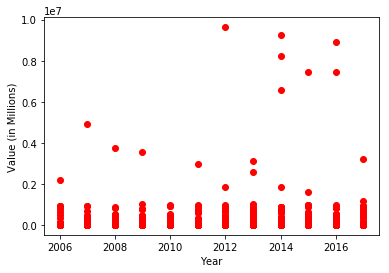

In [118]:
import matplotlib.pyplot as plt

## write your code below
## --------------------------

y = ds1.loc[:,"Total Value"].astype(int)
x = ds1.loc[:,"Year"].astype(int)

fig, ax = plt.subplots(1)
ax.set_ylabel("Value (in Millions)")
ax.set_xlabel("Year")

ax.scatter(x,y,color="Red")



# You may need the lines below. Comment-out as you see fit.
# ax.set_ylabel("Value (in Millions)")
# ax.set_xlabel("Year")


**6b)**

Create a quick and dirty bar plot showing both Residential Value and Non-Residential Value throughout the years for the whole of the PHILIPPINES stacked together in one bar per year (a.k.a. "stacked bar"). No need to format the numbers, but go ahead if you want to.

*Hint:* draw two sets of bars, the second one with a **bottom** parameter pointing to the height of the first one.


**(15 points)**

In [127]:
## write your code below; use more cells as needed
## -------------------------------------------------
sum(ds1.loc[(ds1.loc[:,"Year"]== 2017),["Residential Value"]])


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [121]:
ds1

,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value,Residential Value Per Floor Area,Non-residential Value Per Floor Area
0,2017,Annual,RLIPPINES,02012,0884027,03214520,00942,0301228,04153250,0349,...,0,0444800,09,0,0549,046,0,055228,13.787729,92.852102
1,2017,Annual,Rational Capital Region (NCR),0612,036192,01147791,077,058427,0003187,015,...,0,0044119,04,0,006,06,0,02239,0.054547,3.073544
2,2017,Annual,Rordillera Administrative Region (CAR),003,03183,092144,02,06940,097933,09,...,0,09363,0,0,0,5,0,066,14.111383,66.447222
3,2017,Annual,Region I (Ilocos Region),0610,002633,0913225,014,08002,077823,061,...,0,03252,0,0,02,02,0,0525,9.725444,3.478228
4,2017,Annual,Region II (Cagayan Valley),081,07831,059199,050,08692,065248,04,...,0,00136,4,0,09,0,0,0707,7.506673,1.745275
5,2017,Annual,Region III (Central Luzon),0340,069511,0433864,0386,092612,0758408,086,...,0,072162,0,0,064,03,0,01878,8.189090,10.007580
6,2017,Annual,Region IV-A (CALABARZON),0612,091949,0631254,0260,067770,0693849,052,...,0,073690,0,0,072,09,0,00907,10.238291,0.401429
7,2017,Annual,RIMAROPA Region,032,04325,053365,069,02470,052869,01,...,0,07215,0,0,0,0,0,0225,21.404453,0.717282
8,2017,Annual,Region V (Bicol Region),079,08550,042205,068,05282,016992,05,...,0,01796,0,0,029,0,0,089,3.216963,14.248376
9,2017,Annual,Region VI (Western Visayas),0545,016442,0174959,035,084038,0698583,048,...,0,09920,6,0,0,01,0,00552,8.312704,1.829897


In [146]:
## write your code below; use more cells as needed
## -------------------------------------------------


import matplotlib.pyplot as plt

ValuedRV = ds1.loc[:,"Residential Value"].astype(int)
ValuedNRV = ds1.loc[:,"Non-residential Value"].astype(int)

years = ds1["Year"].drop_duplicates()
margin_bottom = np.zeros(len(ds1["Residential Value"].drop_duplicates()))
margin_bottom = np.zeros(len(ds1["Non-residential Value"].drop_duplicates()))


for num, year in enumerate(years):
    values = list(ds1[ds1["Year"] == year].loc[:, "Residential Value"])
    values = list(ds1[ds1["Year"] == year].loc[:, "Non-residential Value"])

    ds1[ds1["Year"] == year].plot.bar(x="Year",y= ValuedRV, ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=year)
    margin_bottom += values

plt.show()


# You may need the lines below. Comment-out as you see fit.
# ax.set_ylabel("Value (in Millions)")
# ax.set_xlabel("Year")



IndexError: index 4153250 is out of bounds for axis 0 with size 26

**6c)**

Create quick and dirty bar plot showing Total Value for 2017 across Regions, sorted by Total Value in descending order. No need to format the numbers, but you can if you'd like.

Note that all rows except those with PHILIPPINES are for regions, so simply omit the rows with PHILIPPINES.

Also note that Year is now numeric.

**(10 points)**

In [ ]:
## write your code below



In [ ]:




ax.set_ylabel("Amount (in Millions)")
ax.set_xlabel("Regions")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    


# comment this out later. you will need it.
# thank me later.
# ax.set_ylabel("Amount (in Millions)")
# ax.set_xlabel("Regions")
# for tick in ax.get_xticklabels():
#    tick.set_rotation(90)